<a href="https://colab.research.google.com/github/rafay79/Supermarket-Sales-Analysis/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OBJECTIVE:**
The objective of this analysis is to understand the sales data from a supermarket to uncover insights into the best-selling products, peak sales times, and customer preferences. This guide provides a detailed approach using data cleaning, aggregation, summary statistics, trend analysis, and visualization techniques.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt




df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#**Data Cleaning**
 Prepare the data by addressing missing values, duplicates, and correcting data types.

In [51]:
# Checking for missing values columns
print("Missing Values: ")
print(df.isnull().sum())

#if there is any missing values so fill misiing values using by fillna

df = df.fillna(method='ffill')

#verify there are no more missing values

print("Missing Values After Handling: ")
print(df.isnull().sum())

Missing Values: 
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Missing Values After Handling: 
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross inco

<ipython-input-51-c32b22d49c37>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Remove duplicate records from the DataFrame

In [52]:
df = df.drop_duplicates()

In [53]:
#verifying that duplicates values are removed

print("Duplicate Values: ")
print(df.duplicated().sum())

Duplicate Values: 
0


Converitng Date Column to DateTime Format for better analysis


In [54]:
df['Date'] = pd.to_datetime(df['Date'])

Verify the DataTypes Columns

In [55]:
print("Data Types: ")
print(df.dtypes)

Data Types: 
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


#**Data Aggregation**
Summarize the data to gain insights into total sales by product and time.

In [56]:
 # Display the column names to verify
print(df.columns)



Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


 Summarize the data to gain insights into total sales by product and time.


In [57]:
# Aggregate sales data by 'Product line' and sort in descending order
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Display the top 5 best-selling products
print("Top 5 Best-Selling Products:")
print(product_sales.head())


Top 5 Best-Selling Products:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: Total, dtype: float64


Group Data by Time:


In [58]:
# Aggregate sales data by date and sum sales
daily_sales = df.groupby(df['Date'].dt.date)['Total'].sum()

# Display the first few entries of daily sales
print("Daily Sales Overview:")
print(daily_sales.head())


Daily Sales Overview:
Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
Name: Total, dtype: float64


summary statistics for numerical columns


In [59]:
# Generate summary statistics for numerical columns
summary_stats = df.describe()

# Display the summary statistics
print("Descriptive Statistics:")
print(summary_stats)


Descriptive Statistics:
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000              1000.000000   
mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
min           2019-01-01 00:00:00    10.17000                 4.761905   
25%           2019-01-24 00:00:00   118.49750                 4.761905   
50%           2019-02-13 00:00:00   241.76000           

 visualize the distribution of sales


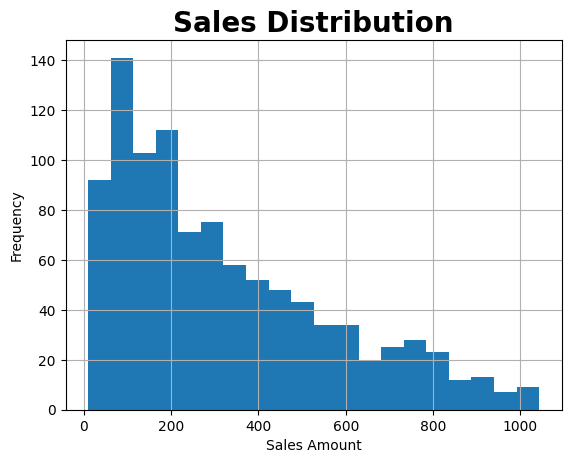

In [60]:
# Plot a histogram to visualize the distribution of sales
df['Total'].hist(bins=20)
plt.title('Sales Distribution',fontsize=20,fontweight=900)
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


Analysis Sales Trends Over Time


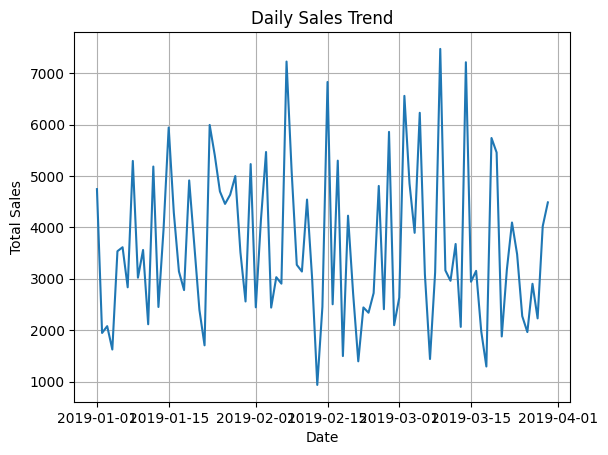

In [61]:
# Plot daily sales to observe trends
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


Analysis By Hour


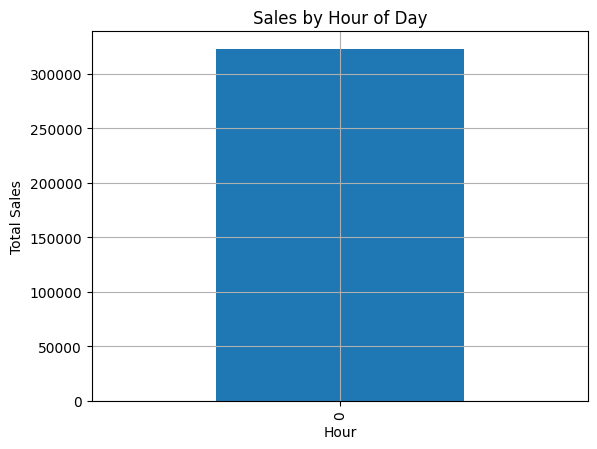

In [62]:

df['Hour'] = df['Date'].dt.hour
hourly_sales = df.groupby('Hour')['Total'].sum()

# Plot sales by hour
hourly_sales.plot(kind='bar')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Product Popularity**

In [63]:
# Count occurrences of each product to determine popularity
popular_products = df['Product line'].value_counts()

# Display the top 5 most popular products
print("Top 5 Most Popular Products:")
print(popular_products.head())


Top 5 Most Popular Products:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Name: count, dtype: int64


**Sales by Customer Type:**

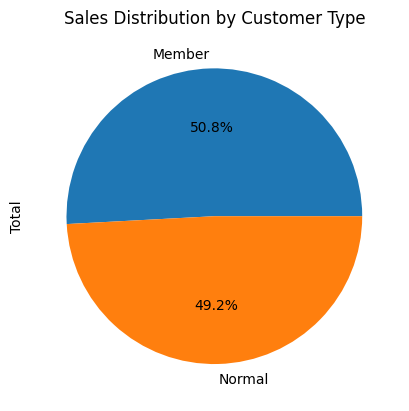

In [64]:
# Aggregate sales data by customer type
sales_by_type = df.groupby('Customer type')['Total'].sum()

# Plot sales by customer type as a pie chart
sales_by_type.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Customer Type')
plt.show()


Top 5 Best-Selling **Products**

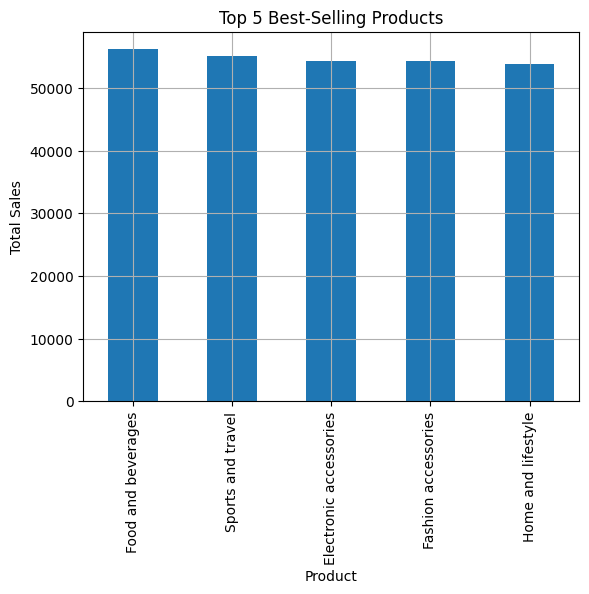

In [65]:
# Plot the top 5 best-selling products
product_sales.head().plot(kind='bar')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
